In [1]:
#importo il dataset:

from sklearn import datasets
from sklearn.datasets import load_breast_cancer
data, target = load_breast_cancer(return_X_y=True, as_frame=True)

In [2]:
#inserisco una colonna con l'attributo target nel mio dataframe e lo chiamo data0

data0 = data
data0.insert(0, 'target', target)
#data0

In [3]:
#conto i dati che hanno 1 e quelli che hanno 0
#in base alla descrizione del dataset ora so che quelli a 1 sono benigni e quelli a 0 sono maligni

target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [4]:
#importo le librerie necessarie per fare il parallel plot

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [5]:
#PROVE CON ALTRI PLOT
#estraggo dal dataframe un paio di attributi da plottare e li inserisco in due variabili

m_rad = data0['mean radius']
m_area = data0['mean area']

#le variabili mi ritornano di tipo pandas.core.series.Series
#recasto a lista per poterle plottare

m_rad = list(m_rad)
m_area = list(m_area)

In [6]:
#creo una funzione per colorare i dati in base all'attributo target

def pltcolor(classe):
    cols=[]
    for c in classe:
        if c==0:
            cols.append('red')
        else:
            cols.append('green')
    return cols


#creo la lista dei colori con la funzione sopra
cols=pltcolor(list(target))


In [7]:
maligno = target[target==0]
benigno = target[target==1]

In [8]:
m_id = list(maligno.index)
b_id = list(benigno.index)
id = list(data0.index)

In [9]:
data_mean = data0.iloc[id, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [10]:
data_worst = data0.iloc[id, [0, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]]

In [11]:
import seaborn as sns
labels = data0.columns

In [12]:
data_focus1 = data_mean.drop(['mean area'], axis = 1)

In [13]:
data_focus2 = data_focus1.drop(['mean radius', 'mean texture', 'mean perimeter'], axis = 1)

<font size=5> DA QUI IN POI SONO PROVE CON I DATI NORMALIZZATI</font>

In [14]:
from sklearn import preprocessing
colms = data_mean.columns
scaler = preprocessing.MinMaxScaler() #creao uno scaler da applicare al dataset di default scala (0,1)
np_scaled = scaler.fit_transform(data_mean) #adatta ai dati e poi li trasforma (restituisce un array)
mean_norm = pd.DataFrame(np_scaled, columns = colms) #riporto i dati alla forma di dataframe

In [15]:
colms = data_worst.columns
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(data_worst)
worst_norm = pd.DataFrame(np_scaled, columns = colms)

In [16]:
pazienti_benigni = data0.loc[data0['target'] == 1]
#pazienti_benigni

In [17]:
pazienti_maligni = data0.loc[data0['target'] == 0]
#pazienti_maligni

In [18]:
colms = data0.columns
scaler = preprocessing.MinMaxScaler() 
np_scaled = scaler.fit_transform(data0) 
data_norm = pd.DataFrame(np_scaled, columns = colms) 

In [19]:
pazienti_benigni_norm = pd.DataFrame(columns = labels)
for i in data_norm.index:
    if target[i]==1:
        pazienti_benigni_norm=pazienti_benigni_norm.append(data_norm.loc[i], ignore_index=True)

In [20]:
pazienti_maligni_norm = pd.DataFrame(columns = labels)
for i in data_norm.index:
    if target[i]==0:
        pazienti_maligni_norm=pazienti_maligni_norm.append(data_norm.loc[i], ignore_index=True)

In [ ]:
paziente_benigno_medio_dataframe_norm=pd.DataFrame(columns = labels)
paziente_benigno_medio_lista_norm =[]
for i in labels:
    att=list(pazienti_benigni_norm[i])
    paziente_benigno_medio_lista_norm.append((sum(att)/len(att)))

paziente_benigno_medio_serie_norm= pd.Series(data=paziente_benigno_medio_lista_norm, index=labels)

paziente_benigno_medio_dataframe_norm = paziente_benigno_medio_dataframe_norm.append(paziente_benigno_medio_serie_norm, ignore_index=True)
paziente_benigno_medio_dataframe_norm.sort_values()
paziente_benigno_medio_dataframe_norm

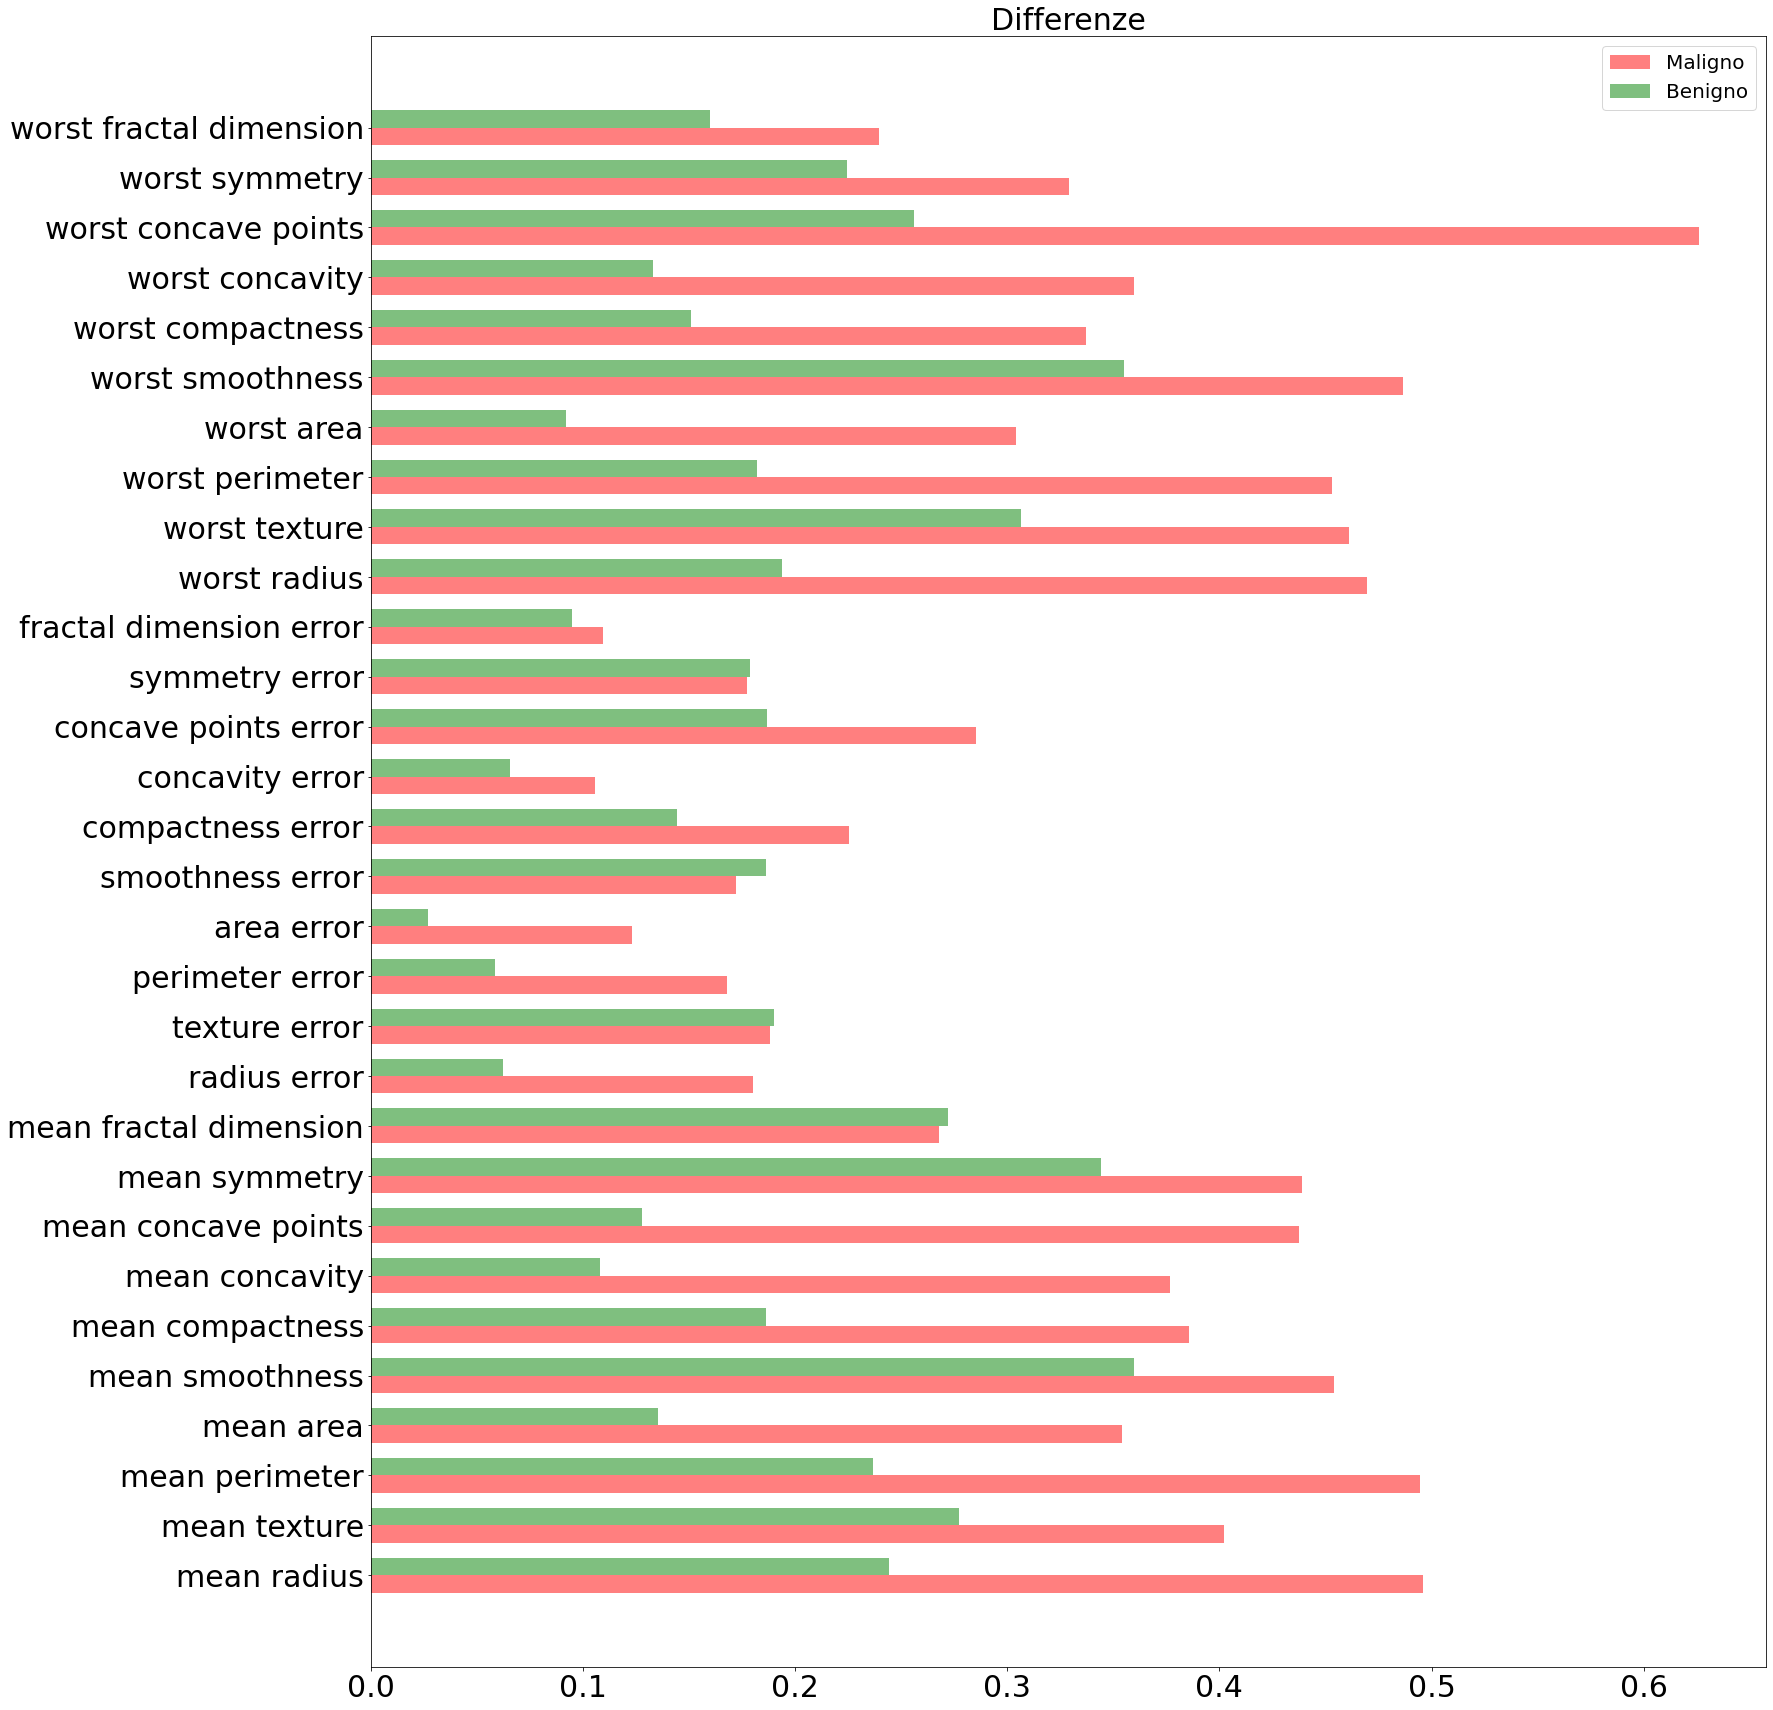

In [35]:
import numpy as np

plt.rc('figure', figsize=(25.0, 30.0))



x = np.arange(len(labels[1:]))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, paziente_maligno_medio_lista_norm[1:], width, label='Maligno', alpha=0.5, color='red')
rects2 = ax.barh(x + width/2, paziente_benigno_medio_lista_norm[1:], width, label='Benigno', alpha=0.5, color='green')

ax.set_title('Differenze', size=30)
ax.set_yticks(x)
ax.set_yticklabels(labels[1:])
ax.legend()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)

plt.show()

In [25]:
paziente_benigno_medio_serie_norm1= paziente_benigno_medio_serie_norm[1:11]
paziente_benigno_medio_serie_norm1=paziente_benigno_medio_serie_norm1.append(paziente_benigno_medio_serie_norm[21:])

In [26]:
paziente_maligno_medio_serie_norm1= paziente_maligno_medio_serie_norm[1:11]
paziente_maligno_medio_serie_norm1 = paziente_maligno_medio_serie_norm1.append(paziente_maligno_medio_serie_norm[21:])

In [27]:
labels1=labels[1:11]
labels1=labels1.append(labels[21:])